# **Final Project Submission**

**Students names:** 
 - BRIAN KARIUKI
 - ISAAC WANG'ANG'A
 - FAITH MUTISYA
 - PAMELA CHEBII
 - JENIFFER GATHARIA

Student pace: part time

Scheduled project review date/time: 19/07/2024

Instructor name: SAMUEL G MWANGI, SAMUEL KARU AMD WINNIE ANYOSO

# **House Sale Analysis & Regression Model For King County**

## **Business Understanding**

### Introduction

 In the vibrant housing market of King County, understanding the factors that influence home prices is essential for real estate professionals, homeowners, and potential buyers. As the region continues to grow and evolve, stakeholders must analyze the dynamics of the housing landscape to make informed decisions. 
 
 This project aims to analyze the King County House Sales dataset to uncover key determinants of housing prices. For this project, we will use both linear and multi-linear regression modeling to analyze house sales in King County, a northwestern county in Washington State


### Business Problem

A real estate agency is having a challenge providing insight to homeowners regarding house pricing and home renovations. This is after the customer query department noted an influx in the number of queries pertaining to the the pricing and price impact after renovations. The agency needs to develop a predictive model that can accurately estimate the impact of various renovation projects on a home's market value within the region.

The goal is to offer data-driven recommendations to homeowners, enabling them to make informed decisions about which renovations to undertake and how these renovations will affect the resale value of their homes.

This project aims to address the following key objectives:

1. **Analyze the Impact of Square Footage on Housing Prices:** Use simple linear regression to evaluate how sqft_living and sqft_above individually impact house prices in King County. This will quantify the relationship between square footage and property values, providing clear insights for homeowners and real estate investors.

2. **Identify Key Determinants of Housing Prices:** Utilize multiple linear regression modeling to analyze the King County House Sales dataset and determine the primary factors that influence housing prices.

3. **Develop Predictive Model for House Pricing:** Create and refine a predictive model using multiple linear regression to accurately estimate house prices based on the identified key features. This model will assist real estate professionals and homeowners in making informed pricing and investment decisions, enhancing the efficiency and effectiveness of the home buying and selling process.

## **Data Understanding**

This project employs the King County House Sales dataset, found in the kc_house_data.csv file. The dataset encompasses a range of features related to house sales, including square footage, the number of bedrooms and bathrooms, waterfront presence, view quality, year built, and renovation status. It also includes the sale price of each property, which we use as the dependent variable in our regression analysis. Detailed descriptions of the columns are available in the column_names.md file. The goal is to use this comprehensive dataset to understand and quantify the effects of various home renovations on property values.

### Import Libraries

In [56]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### Data Loading

In [57]:
# Loading the dataset
df = pd.read_csv("./data/kc_house_data.csv")
df.head()   #to view the first five rows

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## **Data Description**

In [58]:
# Inspecting the column names of the data
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [59]:
# To inspect the no of rows and columns
df.shape

(21597, 21)

- **Number of Rows (Observations):** There are 21597 rows in the DataFrame.
- **Number of Columns (Variables):** There are 21 columns (or variables) in the DataFrame.

### King County Housing Dataset Column Descriptions

1. id - Unique identifier for a house
2.	date - Date when the house was sold
3.	price - Sale price of the house
4.	bedrooms - Number of bedrooms in the house
5.	bathrooms - Number of bathrooms in the house
6.	sqft_living - Square footage of the interior living space
7.	sqft_lot - Square footage of the lot
8.	floors - Number of floors (levels) in the house
9.	waterfront - Indicates whether the house has a view of the waterfront
10.	view - Number of times the house has been viewed
11.	condition - Overall condition of the house
12.	grade - Overall grade of the house based on the King County grading system
13.	sqft_above - Square footage of the house apart from the basement
14.	sqft_basement - Square footage of the basement
15.	yr_built - Year the house was built
16.	yr_renovated - Year the house was renovated
17.	zipcode - ZIP code of the house's location
18.	lat - Latitude coordinate of the house
19.	long - Longitude coordinate of the house
20.	sqft_living15 - Square footage of interior living space for the nearest 15 neighbors
21.	sqft_lot15 - Square footage of the land lots of the nearest 15 neighbors


### Limitations of the Data

Missing Values: Some columns contain missing values (waterfront, view and  yr_renovated), which could impact the completeness and reliability of our findings.

Omitted Variables: The dataset might lack certain relevant variables, potentially affecting the thoroughness of our analysis.

Accuracy Concerns: There may be accuracy issues within the data, as the specifics of the data collection processes are not disclosed, potentially affecting the validity of the analysis.

**Getting information about our data**

In [60]:
#General information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Data description for numerical columns

In [61]:
# statistical description of the data
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

Key Columns Description

- Price: The average price of the houses is approximately $540,297, with a standard deviation of $367,368. The prices range from $78,000 to $7,700,000.

- Bathrooms: On average, houses have around 2.12 bathrooms, with a standard deviation of 0.77. The minimum number of bathrooms is 0.5, and the maximum is 8.

- Square Foot Living (sqft_living): The average square footage of the living area is 2,080.32 sq ft, with a standard deviation of 918.11 sq ft. The living areas range from 370 to 13,540 sq ft.

- Grade: The average grade of houses, which reflects overall quality, is 7.66, with a standard deviation of 1.17. The grades range from 3 to 13.

- Square Foot Above Ground (sqft_above): The average square footage above ground is 1,788.60 sq ft, with a standard deviation of 827.76 sq ft. The range is from 370 to 9,410 sq ft.

- Bedrooms: Houses have an average of 3.37 bedrooms, with a standard deviation of 0.93. The number of bedrooms varies from 1 to 33.

## **Data Preparation**

### EDA & Data Cleaning

Checking for null values

In [62]:
# Code to check missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- From the Output there are 2376, 63 and 3842 null values in the waterfront, view and  yr_renovated columns respectively.
- The rest of the columns do not have missing values

In [63]:
# To address missing values
df = df.fillna(df['yr_renovated'].mean())
df = df.fillna(df['waterfront'].mode()) # categorical data
df = df.fillna(df['view'].mode()) # categorical data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- Waterfont and view have categorical data and therefore used mode to fill the missing values while mean was used for the yr renovated

Recheck for null values

In [64]:
# Rechecking for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- There are now no null values in any of the columns

Checking for Duplicates

In [65]:
# Check for Duplicates
df.duplicated().sum()

0

- No duplicates available

Create a histogram for all the variables to learn the relationship

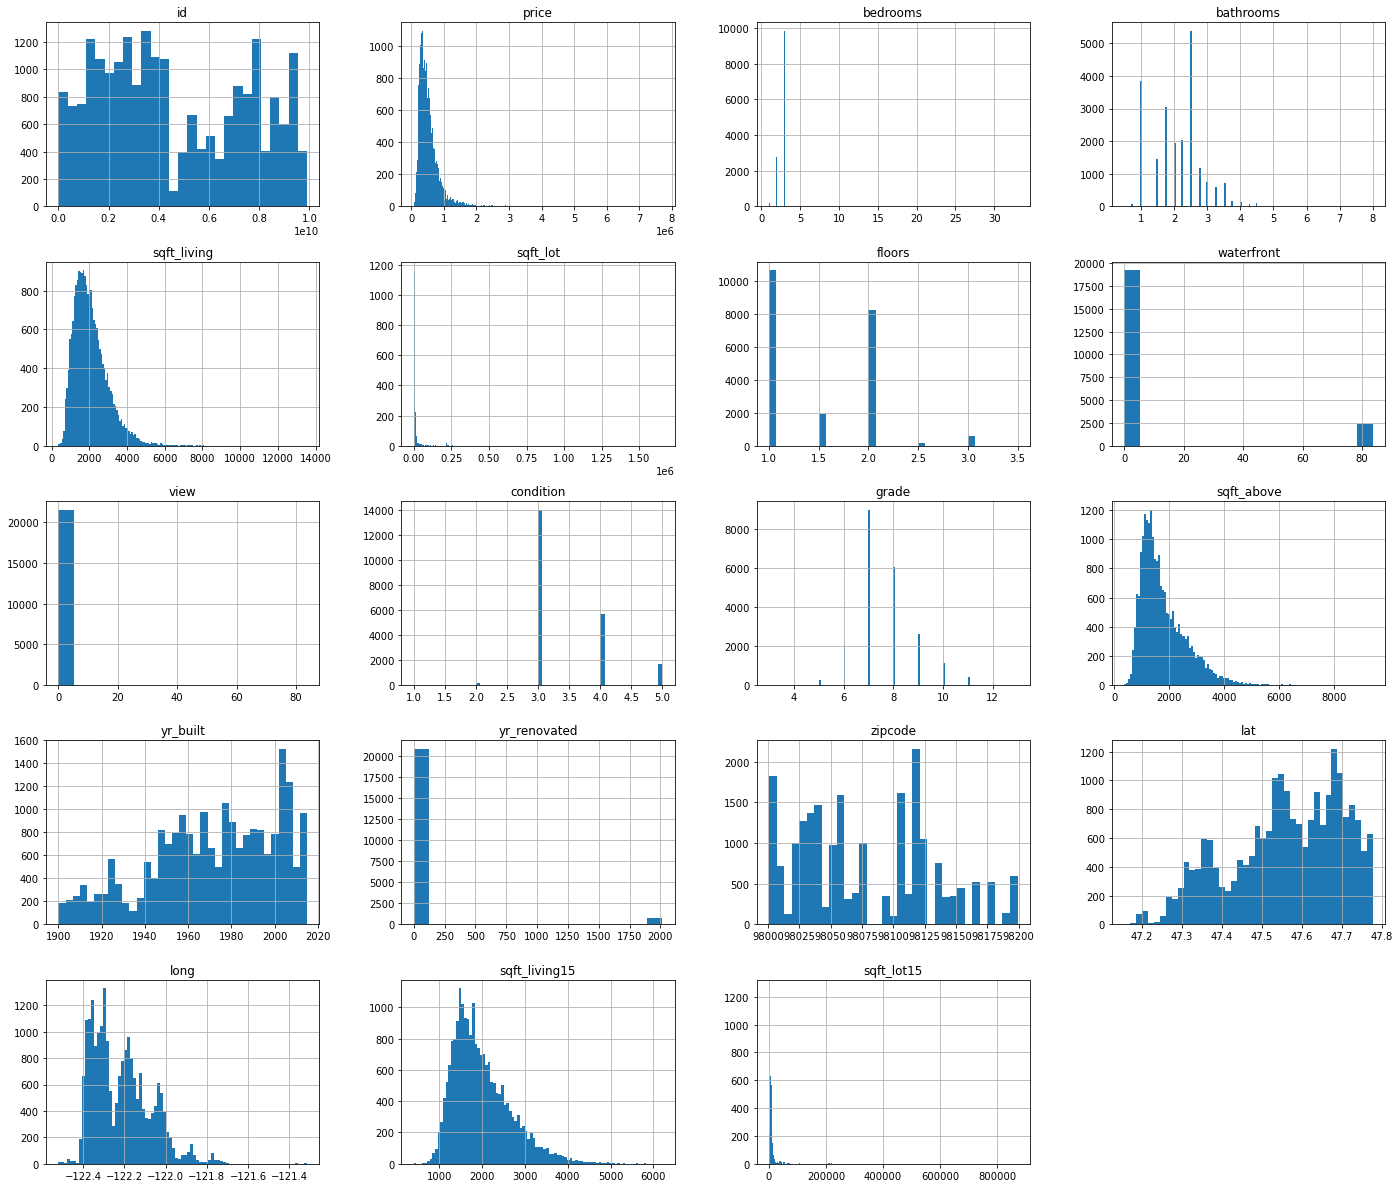

In [66]:
df.hist(figsize= (24,21), bins="auto");

# Record observations on the data

- Price, sqft_living, sqft_lot, sqft_above, sqft_living15 and sqft_lot15 are all continuous data
- Most values are bunched towards the lower end while there are a few very large values
- From the bedrooms feature it appears most houses have around 2 bedrrooms.
- From the bathrooms feature it appears most houses have between two and three bedrooms.
- We can see that there is an increase in the number of houses built as time goes on.
- Most houses sold were built in the 2000s
- Most houses have only one floor

Pairplots to check the relationships

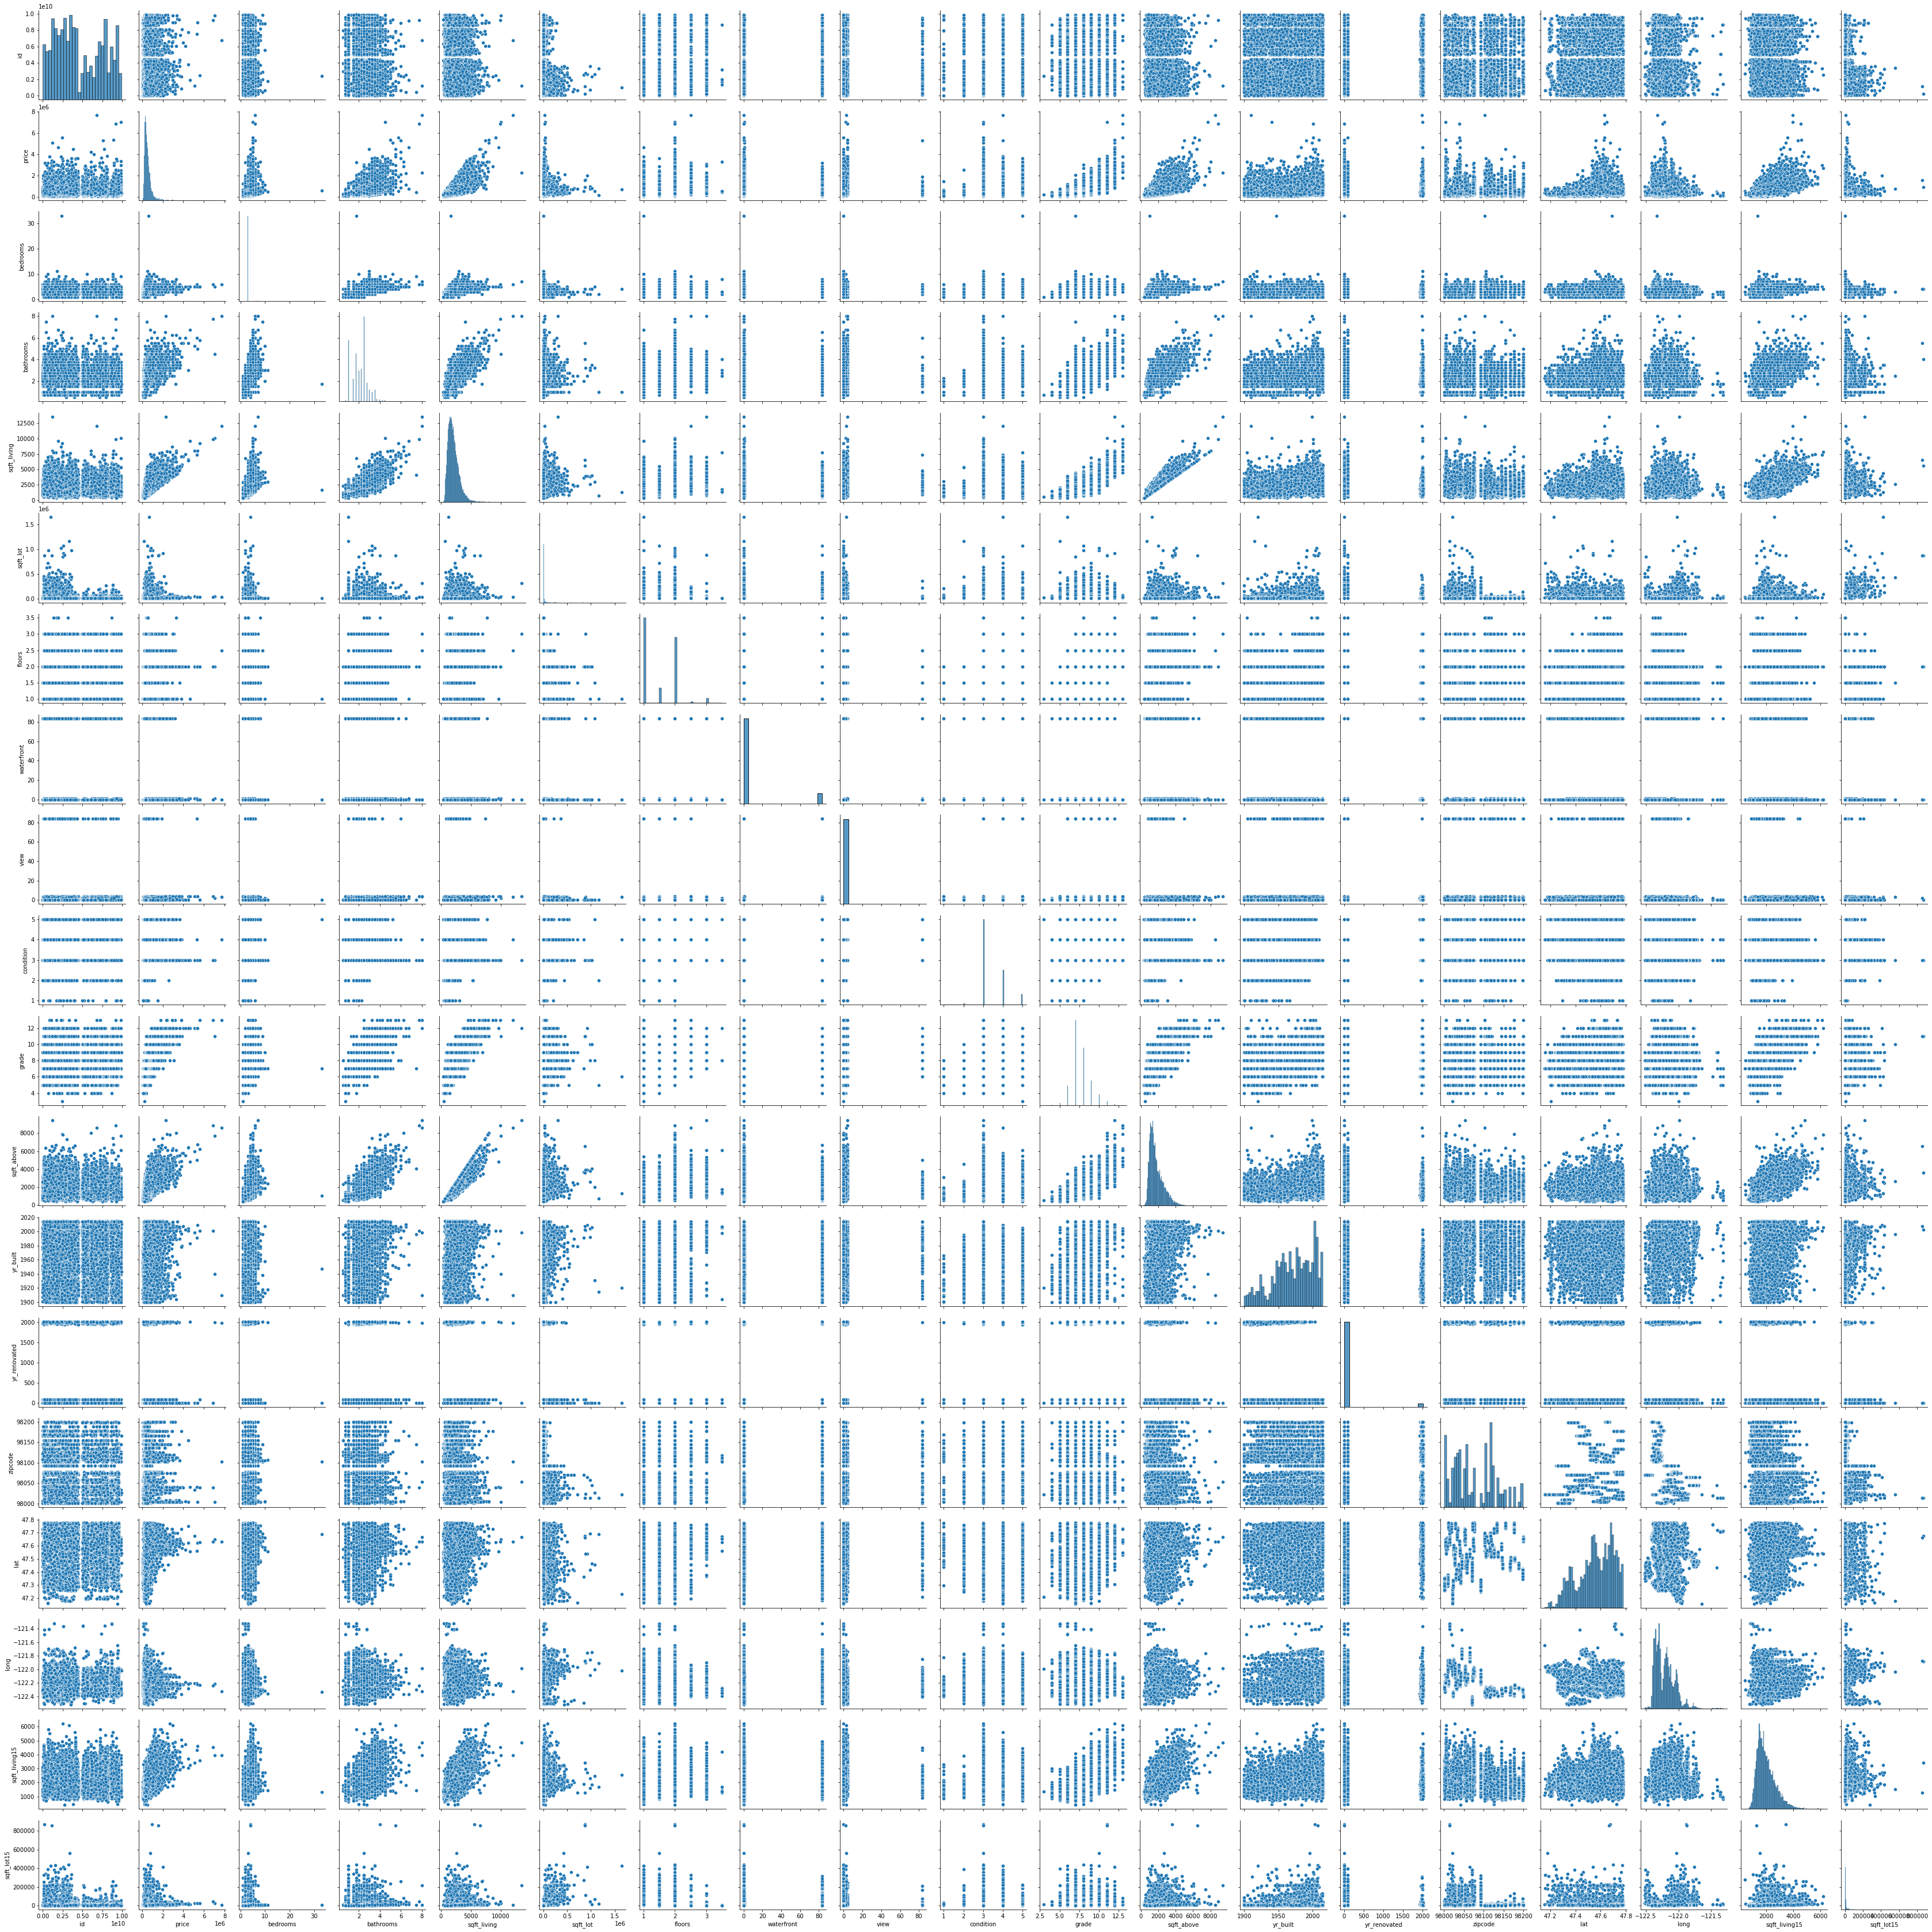

In [67]:
sns.pairplot(data=df)

# Correlation Heatmap

<AxesSubplot:>

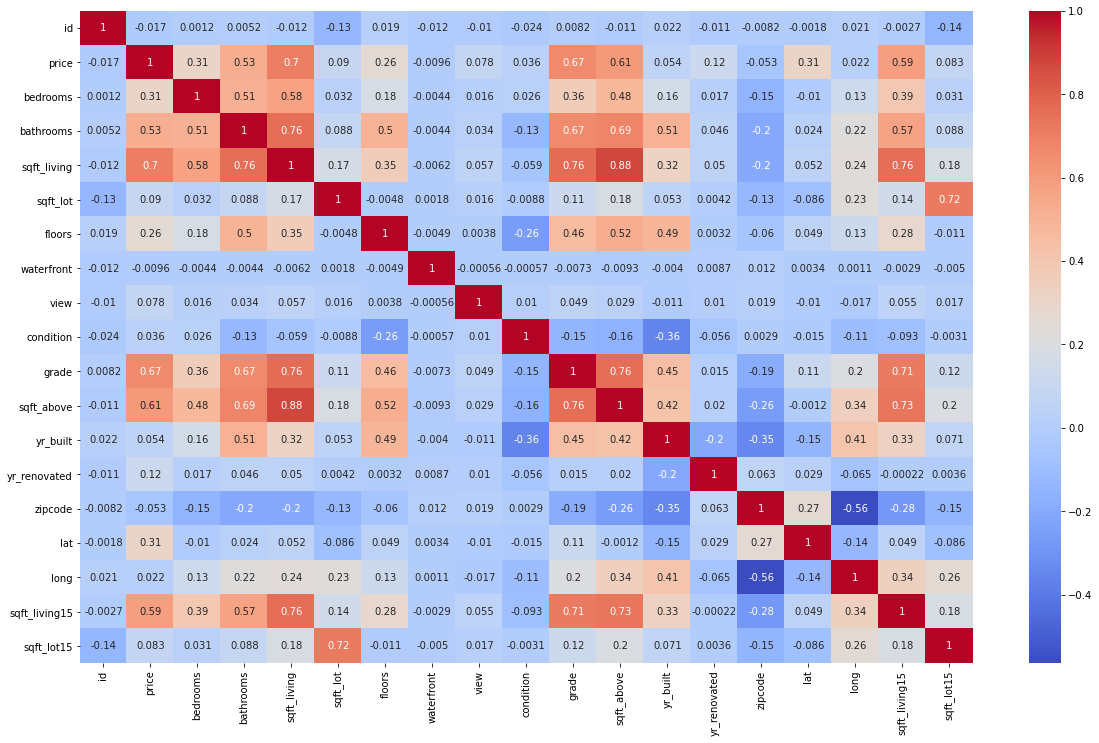

In [68]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [69]:
# To view the correlation matrix in descending order
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.118125
sqft_lot         0.089876
sqft_lot15       0.082845
view             0.077835
yr_built         0.053953
condition        0.036056
long             0.022036
waterfront      -0.009573
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

- Features with a strong correlation (|r| > 0.6) have a substantial impact on the dependent variable (price). In this dataset, sqft_living, grade, and sqft_above exhibit strong positive correlations with house prices. 

- Features with a moderate correlation (0.3 < |r| ≤ 0.6) also play a significant role in determining house prices but to a lesser extent than those with strong correlations. In this dataset, sqft_living15, bathrooms, view, bedrooms, and lat are moderately correlated with house prices.

- Features with a low correlation (|r| ≤ 0.3) have minimal influence on the dependent variable. In this dataset, waterfront, floors, yr_renovated, sqft_lot, sqft_lot15, yr_built, condition, long, id, and zipcode show low correlations with house prices.

## Feature Selection

Based on correlation analysis and domain knowledge, we recommnded below features for our model due to their potential impact on the target variable (price) and their practical relevance in real estate valuation.

After analyzing the correlation heatmap, it is evident that the most important features influencing house prices are `bathrooms`, `sqft_living`, `grade`, `sqft_above` and `bedrooms`. This conclusion is based on their strong correlation values with the `price` variable. 

- `bathrooms` (0.53): Indicates a moderate positive correlation, suggesting that houses with more bathrooms tend to have higher prices.
- `sqft_livin`g (0.70): Shows a strong positive correlation, meaning that larger living areas significantly increase house prices.
- `Grade` (0.67): Demonstrates a strong positive correlation, implying that higher quality and better-graded houses are priced higher.
- `sqft_above` (0.61): Reflects a strong positive correlation, indicating that houses with more above-ground living space are more expensive.
- `bedrooms` (0.31): This shows a moderate correlation with price. However, using domain knowledge, it is likely that houses with more bedrooms fetch higher prices in the market.
- `View` (0.39)- It has a moderate correlation with price. However, based on domain knowledge, houses with a good view are likely to fetch hihger prices than those without a view.

These correlation values highlight the significant impact of these features on house prices, guiding homeowners and real estate professionals in their decision-making processes.

In [70]:
# Selecting features
df = df[[ "price", "bathrooms", "sqft_living", "grade", "sqft_above", "bedrooms"]]

Pair Plot

In [71]:
#plotting a pairplot to show correlation
sns.pairplot(data=df)

- The pairplot for the selected features is shown above to better understand the relationships between the features and the target variable price The scatter plots in the pairplot show linear relationships between price and the selected features, particularly for sqft_living and grade.

- The Pairplot confirms that features like sqft_living, grade, and sqft_above have a stronger impact on price, while bathrooms and bedrooms show a positive but less pronounced relationship with price.

Checking for outlliers

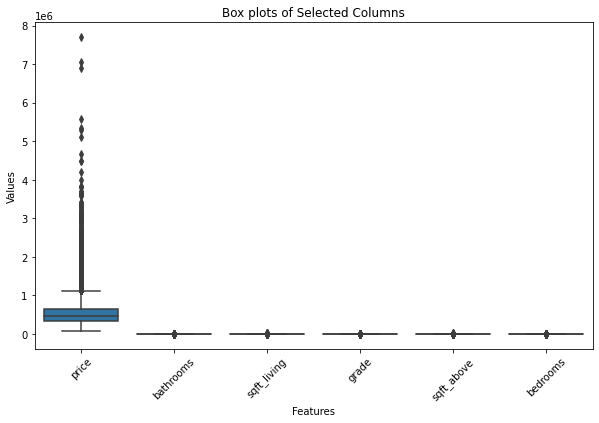

In [ ]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

The box plot shows that there are a significant number of outliers in the "price" data, particularly at the higher end of the price range. These outliers indicate that while most house prices cluster within a certain range, there are some properties that are significantly more expensive than the majority. This could be due to unique attributes such as luxury features, prime locations, or very large properties.

### Visualization

**Visualizing the relationship between Square Footage of the living area and Housing Prices:**

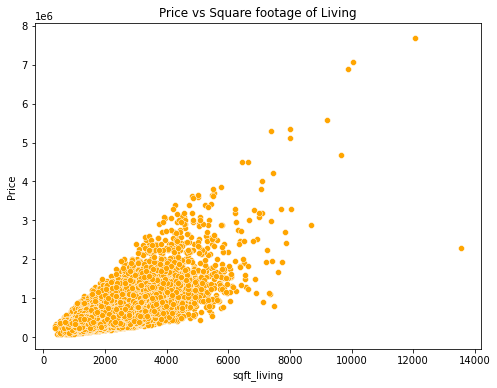

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x= 'sqft_living', y= 'price', color='orange', data=df)
plt.title('Price vs Square footage of Living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

- Observation: From the Scatter plot we observe that the price and square foot living area have a strong co-orelation with a  positive trend . As the Square foot living area increases the price of the house also increases.

- Implication: This implies that houses with larger square foot living areas, command higher prices

**Visualizing the relationship between housing price and grade**

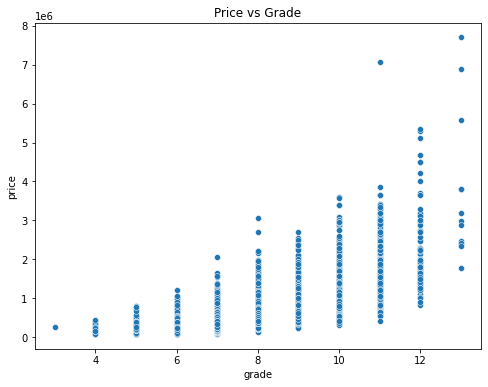

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='grade', y='price', data=df)
plt.title('Price vs Grade')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

- Observation- The scatter plot indicates that there is a positive correlation between the quality grade of houses and their prices.

- Implication- Higher grade houses tend to have higher prices, but there is variation within each grade level. This trend is consistent across the entire range of grades, showing a strong relationship between house quality and market value.

**Visualizing the relationship between Square Footage Living Area and Grade**

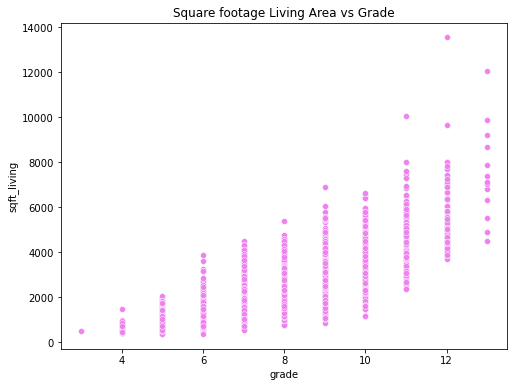

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='grade', y='sqft_living', color= "violet", data=df)
plt.title('Square footage Living Area vs Grade')
plt.xlabel('grade')
plt.ylabel('sqft_living')
plt.show()

- observations- From the scatterplot above, we observe that there is a clear positive correlation between the grade of the house and the living area. Higher-grade houses tend to have larger living areas.
 
- Implication- This implies that Higher grade houses can justify their higher prices with one of the factors being having a larger living area

**Visualizing the relationship between Price and bathrooms**

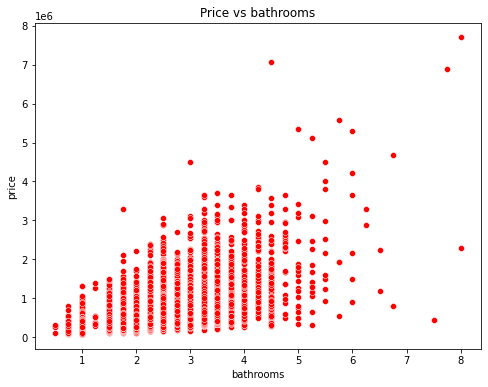

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bathrooms', y='price', color= 'red', data=df)
plt.title('Price vs bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()



- Observation- From the scatterplot above, we observe that there is a clear positive correlation between the no of bathrooms and the price.
 

- Implication- This implies that houses with more bathrooms fetch higher prices in the market.

## **Modelling**

### Model 1

In [ ]:
# Selecting the feature (sqft_living) and target (price)
X = df['sqft_living']
y = df['price']

# Adding a constant term to the predictor
X = sm.add_constant(X)

# Fitting the simple linear regression model
model = sm.OLS(y, X).fit()

# Making predictions based on the model
predictions = model.predict(X)

# Printing the model summary to evaluate performance
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:57:21   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

- The R-squared value of 0.493 indicates that approximately 49.3% of the variability in house prices can be explained by the square footage of the living area (sqft_living). This suggests a moderate level of explanatory power of the model.

- The model coefficients show that the intercept (const) is -43,999, which is statistically significant with a t-statistic of -9.975 and a p-value of 0.000. The coefficient for sqft_living is 280.863, also highly significant with a t-statistic of 144.819 and a p-value of 0.000, indicating a strong positive relationship between square footage and house prices.

#### Visualizing the Relationship Between Square Foot Living and Price

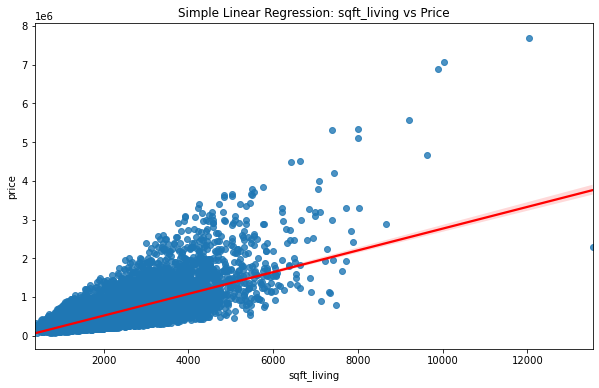

In [ ]:
# Plotting the regression line along with the data points
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_living', y='price', data=df, line_kws={"color": "red"})

# Adding title and displaying the plot
plt.title('Simple Linear Regression: sqft_living vs Price')
plt.show()

- The above visualization shows the actual data estimates of the living area square footage

- We note from the above that the price of the house increases as the living room square footage increases.

#### Actual Versus Predicted Value Visualization

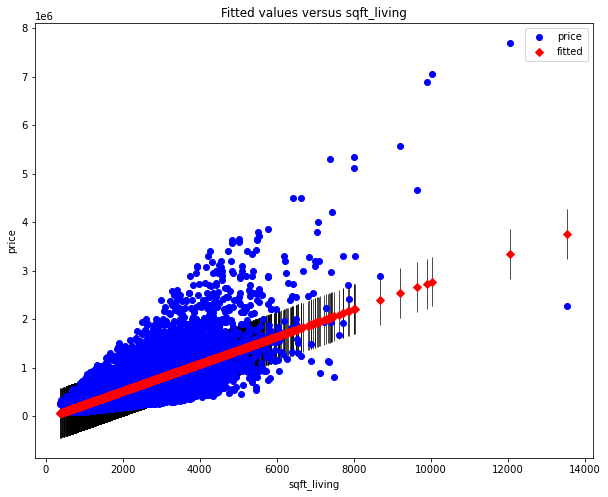

In [ ]:

# Create a figure and axes to show the actual versus predicted values
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the fit using the baseline_results
sm.graphics.plot_fit(model, "sqft_living", ax=ax)

# Display the plot
plt.show()

#### Regression Diagnostic Plot For the Linear Model

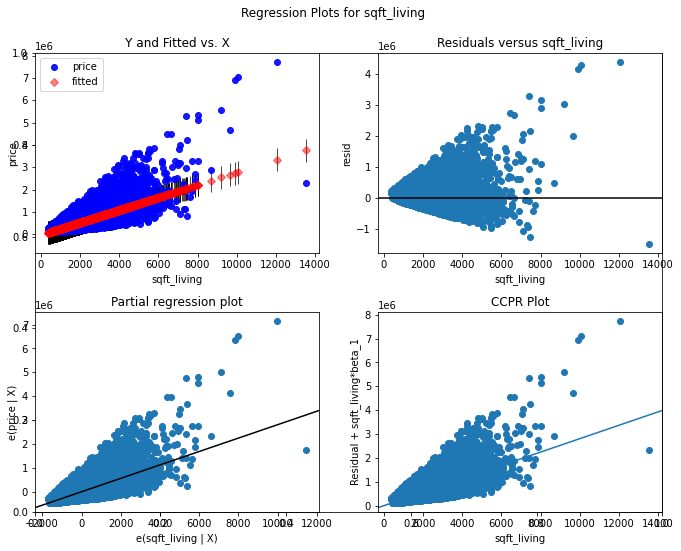

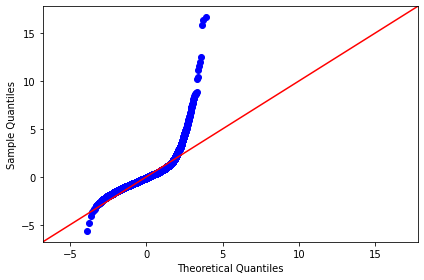

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig) 
fig = sm.graphics.qqplot(model.resid, dist=stats.norm,line='45', fit=True)  #To check the normality of the residuals
fig.tight_layout()
plt.show();

* The image shows a plot of the regression with the "sqft_living" as the exogenous variable
* Plot 1: The dependent variable vs. sqft_living with the regression line.
* Plot 2: Residuals vs. sqft_living to check for homoscedasticity (constant variance of residuals).
* Plot 3: Partial regression plot to show the relationship between price and sqft_living while accounting for other variables.
* Plot 4: The leverage plot to detect influential data points.
* Plot 5: The Q-Q plot to check the normality of residuals.

**Evaluating Model 1**

In [ ]:
#train_test_split using 0.8 as the train and 0.2 as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#Training our linear model
model = LinearRegression()
model.fit(X_train,y_train)

#run the y_predict
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R Squared:" ,r2)

Mean Squared Error: 65977373783.61759
Mean Absolute Error: 170982.92465955476
R Squared: 0.49332469237979504


The performance metrics for the linear regression model indicate the following:

- Mean Squared Error (MSE): The MSE value of approximately 65.98 billion suggests that the model's predictions, on average, deviate from the actual house prices by a large amount when squared differences are considered. This indicates a significant error magnitude, possibly due to outliers or a wide range of house prices.

- Mean Absolute Error (MAE): The MAE value of approximately 170,983 indicates that, on average, the model's predictions differ from the actual prices by around $170,983. While this provides a clearer picture of prediction accuracy than the MSE, it still points to considerable errors in prediction, which could affect decision-making.

- R Squared (R²): The R² value of approximately 0.493 suggests that the model explains about 49.3% of the variance in house prices based on the predictor variables used. While this indicates a moderate fit, it also means that over 50% of the variance in house prices remains unexplained by the model, highlighting the need for additional features or more complex modeling techniques to improve predictive accuracy.

Overall, these metrics suggest that while the model captures some relationships between the features and house prices, there is substantial room for improvement. The high error values and moderate R² suggest that the model could benefit from additional relevant features, better handling of outliers, or the use of more advanced modeling techniques.

### **Model 2**

### Multiple linear Regression

Identifying Key Determinants of Housing Prices through  Multiple Linear Regression

Selecting dependent and independent variables

In [ ]:
# Selecting dependent and independent variables
x = df.drop('price', axis=1)
y= df.price

# Train Test Split at test size 20% and Train size 80%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#check shape of both train and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((17277, 5), (17277,), (4320, 5), (4320,))

- The output indicates that after performing a train-test split on the dataset, the training set consists of 17,277 samples and 5 features (columns), while the test set has 4,320 samples with the same 5 features. The shapes of the y_train and y_test arrays show that they contain the corresponding target variable values (house prices) for the training and test datasets, respectively. The split is 80% for training and 20% for testing, which aligns with the specified test size of 20%.

### Scale Data

In [ ]:
# Scale the data
scaler = StandardScaler()

# Transforming the scaled data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modelling
model = LinearRegression()

# training the model
model.fit(x_train_scaled,y_train)

# Linear Regression with scaled predictors 
y_pred = model.predict(x_test_scaled)
df = pd.DataFrame({"true":y_test,"pred":y_pred})

#Validation

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R Squared:" ,r2)



Mean Squared Error: 60197315834.49932
Mean Absolute Error: 158764.49085394148
R Squared: 0.5377128283646696



Model 2 outperforms Model 1 in all the key metrics:

- Mean Squared Error (MSE): Model 2 has a lower MSE (60,197,315,834.50) compared to Model 1 (65,977,373,783.62), indicating that Model 2's predictions are closer to the actual values on average.

- Mean Absolute Error (MAE): Model 2 also shows a lower MAE (158,764.49) than Model 1 (170,982.92), meaning the average absolute error of predictions in Model 2 is smaller, which generally suggests better predictive accuracy.

- R Squared (R²): Model 2 has a higher R² value (0.538) compared to Model 1 (0.493), signifying that Model 2 explains a greater proportion of the variance in the target variable.

Overall, Model 2 is more accurate and provides a better fit to the data compared to Model 1.




## Regression Results

### Conclusion

The analysis of the King County House Sales dataset using both simple and multiple linear regression models reveals key insights into the factors influencing housing prices. The simple linear regression highlighted the impact of square footage on property values, with sqft_living (a correlation of 0.7) showing a strong correlation with house prices. 


The multiple linear regression model further refined these insights by identifying additional significant determinants such as the number of bathrooms, sqft_living, grade, sqft_above and bedrooms. These findings provide a robust foundation for understanding how different features contribute to the overall market value of homes.

# Recommendations

1. **Homeowners should invest in increasing living  area space:**
Homeowners in King County should consider expanding their living areas, as the analysis shows the highest positive correlation with the housing price. For homeowners, this investment can significantly increase the property value.

2. **Homeowners should consider key features like housing grade, number of bathrooms, and square footage above when renovating:**
Homeowners in King County should prioritize improvements in key determinants like housing grade, number of bathrooms, and square footage above ground to maximize property value and attract higher prices.

3. **Utilize Predictive Modeling for Pricing Strategies:**
Real estate agents and homeowners should use the predictive model to evaluate renovation projects before committing resources. By inputting different renovation scenarios into the model, stakeholders can forecast the potential return on investment (ROI) and prioritize projects that offer the highest value increase.
